<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/MLP/week9_graded_partA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Url= "https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv"



In [ ]:
import pandas as pd
data = pd.read_csv(Url)

In [ ]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(7050, 16)

In [ ]:
data.dropna(inplace=True, axis=1)

In [ ]:
data.shape

(7050, 12)

In [ ]:
y = data['status_type']

In [ ]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
X = data.drop(['status_type'], axis=1)

In [ ]:
X.drop(["status_id", "status_published"], axis=1, inplace=True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(y)
y

array([3, 1, 3, ..., 1, 1, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
X_tans = scale.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
clus = KMeans(n_clusters=2, random_state=10)

In [ ]:
clus_res = clus.fit(X_tans, y)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clus_res.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
import numpy as np
clus1 = KMeans(n_clusters=4, random_state=10)
clus1.fit(X_tans, y)
np.unique(clus1.labels_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 2, 3], dtype=int32)

In [ ]:
clus_res.labels_ == y

array([False, False, False, ..., False, False, False])

In [ ]:
clus.inertia_

48278.09824220544

In [ ]:
clustering = AgglomerativeClustering().fit(X_tans, y)

In [ ]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
clustering.n_leaves_

7050

In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(y, clustering.labels_)

0.012907801418439717

In [61]:
accuracy_score(y, clus1.labels_)

0.6270921985815603

In [65]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

tn, fp, fn, tp = confusion_matrix(y, clus1.labels_)

In [67]:
np.sum((tn+tp))

2397

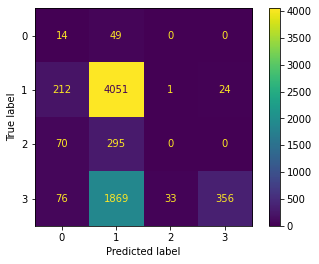

In [64]:
ConfusionMatrixDisplay.from_predictions(y, clus1.labels_)